## 车车信息交互——未知障碍物挡道场景
- VEH2在VEH1车前方行使，检测到道路前方有一障碍物在道路中央，阻碍正常同行。
- VEH2通过车车交互，将该信息以路面物体信息的格式编码，之后播报给同在当前车道行使的VEH1（车车交互机制）。
- VEH2通过车云交互，将道路物体信息对云端CLOUD进行数据上报。相应地，CLOUD接收到VEH2播报的路面物体信息后，根据我们设计好的车云交互机制，将该信息转换到车道级交通管控信息（道路实时信息）。之后，将该条车道关闭的消息以交通管控的信息格式广播至当前道路上的所有车辆。

### 1 构建高精地图（未知障碍物场景）数据库
- 场景是基于Matlab的Driving Scenario Designer工具设计并生成高精地图数据 
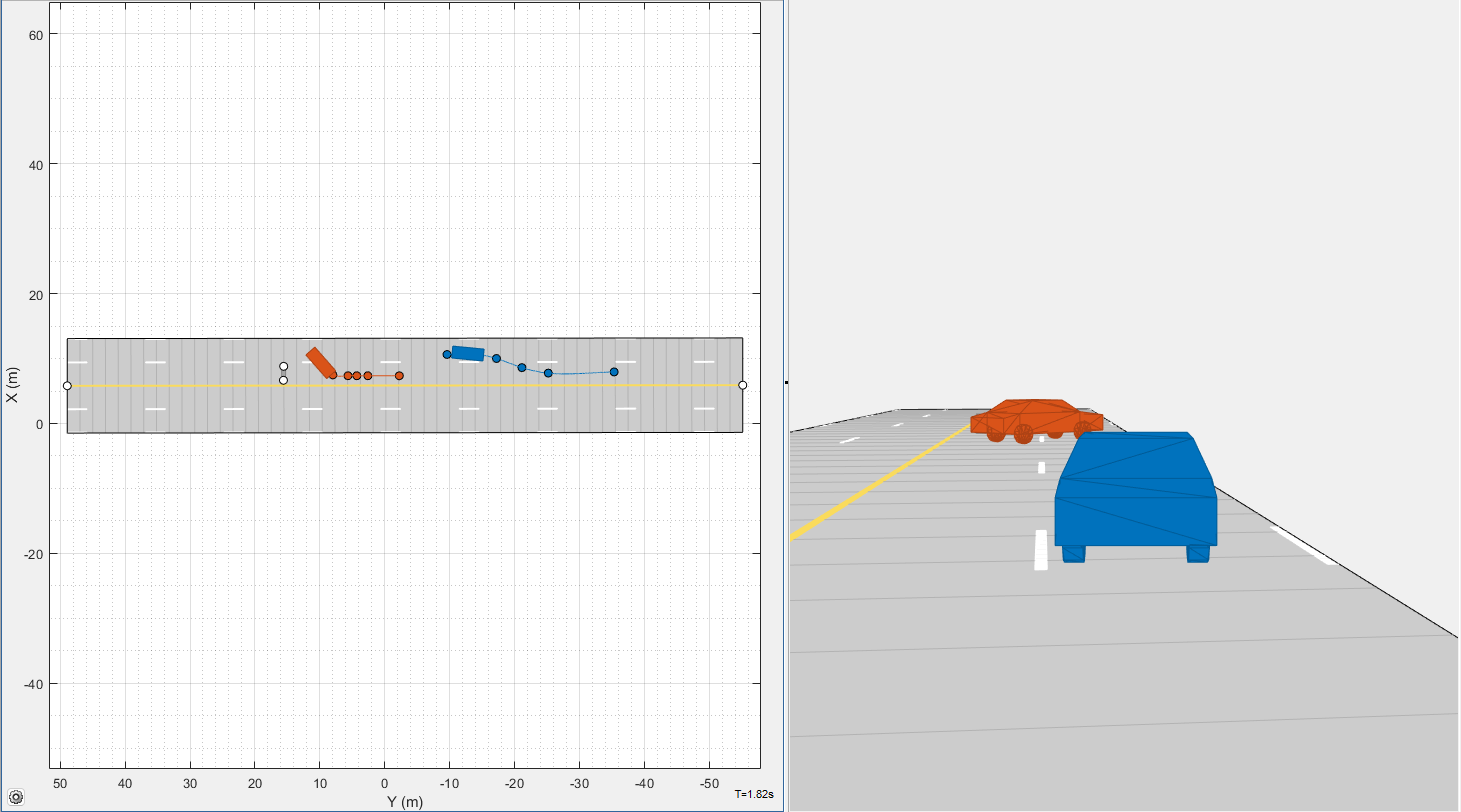

In [1]:
# 准备必要python包
import sqlite3
import numpy as np
import math

### 1.1 搭建车端数据库

In [4]:
conn1 = sqlite3.connect('VEH1.db')
cursor1 = conn1.cursor()

vnames = ["VehicleStatus", "RoadObject", "TemporarySign", "Emergencies","TemporaryObject"]

for i in range(5):
    table_name = vnames[i]
    cursor1.execute(f'''CREATE TABLE IF NOT EXISTS {table_name} (
                        "NAME" text,
                        "VALUE" text)''')

# # VEH1.db
# # data of vehiclestatus, time0 
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('position','7.9400,35.3000,0.0000'))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('roadid','R1'))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('laneid','L1'))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('length',4.848))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('width',1.842))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('hight',1.517))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('velocity',14))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('accelerate','null'))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('orientation',0))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('energy',2))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('type','C2'))

# # data of vehiclestatus, time1 
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('position','7.7600,-25.1600,0.0100'))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('roadid','R1'))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('laneid','L1'))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('length',4.848))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('width',1.842))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('hight',1.517))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('velocity',11))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('accelerate','null'))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('orientation',0))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('energy',2))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('type','C2'))

# # data of vehiclestatus, time2 
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('position','8.6000,-21.1000,0.0000'))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('roadid','R1'))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('laneid','L1'))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('length',4.848))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('width',1.842))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('hight',1.517))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('velocity',11))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('accelerate','null'))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('orientation',0))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('energy',2))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('type','C2'))

# data of vehiclestatus, time3 
cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('position','10.0100,-17.1800,0.0100'))
cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('roadid','R1'))
cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('laneid','L2'))
cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('length',4.848))
cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('width',1.842))
cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('hight',1.517))
cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('velocity',11))
cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('accelerate','null'))
cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('orientation',0))
cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('energy',2))
cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('type','C2'))

# # data of vehiclestatus, time4 
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('position','10.6200,-14.3200,0.0100'))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('roadid','R1'))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('laneid','L2'))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('length',4.848))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('width',1.842))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('hight',1.517))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('velocity',14))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('accelerate','null'))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('orientation',0))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('energy',2))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('type','C2'))

# # data of vehiclestatus, time5 
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('position','10.6200,-9.5700,0.0100'))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('roadid','R1'))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('laneid','L2'))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('length',4.848))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('width',1.842))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('hight',1.517))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('velocity',14))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('accelerate','null'))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('orientation',0))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('energy',2))
# cursor1.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('type','C2'))

# VEH1 data of roadobject
# data of roadobject time0
cursor1.execute('INSERT INTO RoadObject VALUES (?, ?)', ('type','null'))
cursor1.execute('INSERT INTO RoadObject VALUES (?, ?)', ('position','null'))
cursor1.execute('INSERT INTO RoadObject VALUES (?, ?)', ('distance','null'))
cursor1.execute('INSERT INTO RoadObject VALUES (?, ?)', ('length','null'))
cursor1.execute('INSERT INTO RoadObject VALUES (?, ?)', ('width','null'))
cursor1.execute('INSERT INTO RoadObject VALUES (?, ?)', ('height','null'))

conn1.commit()
conn1.close()

In [5]:
# 查看数据库
conn1 = sqlite3.connect('VEH1.db')
cursor1 = conn1.cursor()
table_name = "RoadObject"
cursor1.execute(f'PRAGMA table_info({table_name})')
table_columns = cursor1.fetchall()
column_names = [column[1] for column in table_columns]

cursor1.execute(f'SELECT * FROM {table_name}')
data_from_table = cursor1.fetchall()

print(f'{table_name} 表的全部内容：')
print(column_names)
for row in data_from_table:
    print(row)

conn1.close()

RoadObject 表的全部内容：
['NAME', 'VALUE']
('type', 'null')
('position', 'null')
('distance', 'null')
('length', 'null')
('width', 'null')
('height', 'null')


In [6]:
# VEH2.db
conn2 = sqlite3.connect('VEH2.db')
cursor2 = conn2.cursor()

vnames = ["VehicleStatus", "RoadObject", "TemporarySign", "Emergencies","TemporaryObject"]

for i in range(5):
    table_name = vnames[i]
    cursor2.execute(f'''CREATE TABLE IF NOT EXISTS {table_name} (
                        "NAME" text,
                        "VALUE" text)''')
    #cursor1.execute(f'INSERT INTO {table_name} VALUES (?,' ?)', ("APE", "105-101"))

# # VEH2 datad of vehiclestatus
# # data of vehiclestatus, time0 
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('position','7.3500,-2.2200,0.0100'))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('roadid','R1'))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('laneid','L1'))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('length',4.848))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('width',1.842))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('hight',1.517))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('velocity',14))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('accelerate','null'))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('orientation',0))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('energy',2))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('type','C2'))

# # data of vehiclestatus, time1 
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('position','7.3500,2.6200,0.0100'))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('roadid','R1'))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('laneid','L1'))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('length',4.848))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('width',1.842))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('hight',1.517))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('velocity',11))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('accelerate','null'))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('orientation',0))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('energy',2))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('type','C2'))

# # data of vehiclestatus, time2 
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('position','7.3500,4.3200,0.0100'))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('roadid','R1'))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('laneid','L1'))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('length',4.848))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('width',1.842))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('hight',1.517))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('velocity',11))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('accelerate','null'))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('orientation',0))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('energy',2))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('type','C2'))

# data of vehiclestatus, time3 
cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('position','7.3500,5.6800,0.0100'))
cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('roadid','R1'))
cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('laneid','L1'))
cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('length',4.848))
cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('width',1.842))
cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('hight',1.517))
cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('velocity',11))
cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('accelerate','null'))
cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('orientation',0))
cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('energy',2))
cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('type','C2'))

# # data of vehiclestatus, time4 
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('position','7.4800,8.0000,0.0100'))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('roadid','R1'))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('laneid','L1'))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('length',4.848))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('width',1.842))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('hight',1.517))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('velocity',14))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('accelerate','null'))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('orientation',0))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('energy',2))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('type','C2'))

# # data of vehiclestatus, time5 
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('position','8.3700,9.0200,0.0100'))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('roadid','R1'))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('laneid','L1'))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('length',4.848))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('width',1.842))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('hight',1.517))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('velocity',14))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('accelerate','null'))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('orientation',0))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('energy',2))
# cursor2.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('type','C2'))


# # VEH2 data of roadobject
# # data of roadobject time0
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('type', 'null'))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('position', 'null'))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('distance', 'null'))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('length', 'null'))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('width', 'null'))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('height', 'null'))

# # data of roadobject time1
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('type', 'null'))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('position', 'null'))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('distance', 'null'))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('length', 'null'))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('width', 'null'))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('height', 'null'))

# # data of roadobject time2
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('type', 0))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('position', '8.8000,15.5700'))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('distance', 11.0100))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('length', 2.15))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('width', 0.61))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('height', 0.81))

# data of roadobject time3
cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('type', 0))
cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('position', '8.8000,15.5700'))
cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('distance', 9.0100))
cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('length', 2.15))
cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('width', 0.61))
cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('height', 0.81))

# # data of roadobject time4
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('type', 0))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('position', '8.8000,15.5700'))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('distance', 7.8000))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('length', 2.15))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('width', 0.61))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('height', 0.81))

# # data of roadobject time5
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('type', 0))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('position', '8.8000,15.5700'))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('distance', 6.0100))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('length', 2.15))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('width', 0.61))
# cursor2.execute('INSERT INTO RoadObject VALUES (?, ?)', ('height', 0.81))

conn2.commit()
conn2.close()

In [7]:
conn2 = sqlite3.connect('VEH2.db')
cursor2 = conn2.cursor()

table_name = "RoadObject"
cursor2.execute(f'PRAGMA table_info({table_name})')
table_columns = cursor2.fetchall()
column_names = [column[1] for column in table_columns]

cursor2.execute(f'SELECT * FROM {table_name}')
data_from_table = cursor2.fetchall()

print(f'{table_name} 表的全部内容：')
print(column_names)
for row in data_from_table:
    print(row)

conn2.close()

RoadObject 表的全部内容：
['NAME', 'VALUE']
('type', '0')
('position', '8.8000,15.5700')
('distance', '9.01')
('length', '2.15')
('width', '0.61')
('height', '0.81')


### 1.2 搭建云端数据库

In [6]:
# CLOUD.db
conn3 = sqlite3.connect('CLOUD_1.db')
cursor3 = conn3.cursor()

cnames = ['Road', 'Lane', 'TrafficFlow', 'TrafficLight', 'TrafficControl', 'Weather', 'RoadEvents', 'RoadSurface', 'Extensible', 'VehicleStatus', 'RoadObject']
for i in range(len(cnames)):
    table_name = cnames[i]
    cursor3.execute(f'''CREATE TABLE IF NOT EXISTS {table_name} (
                        "NAME" text,
                        "VALUE" text)''')

# Road
cursor3.execute('INSERT INTO Road VALUES (?, ?)', ('roadid','R1'))
cursor3.execute('INSERT INTO Road VALUES (?, ?)', ('type', 1))
cursor3.execute('INSERT INTO Road VALUES (?, ?)', ('startpoint', '5.9000,-55.1000'))
cursor3.execute('INSERT INTO Road VALUES (?, ?)', ('length',104.0000))

# Lane
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('laneid','L1'))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('length',104.0000))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('width',3.6000))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('gradient',0.0000))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('speedlimit',16.667))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('direction',1))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('iscontrol',0))

cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('laneid','L2'))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('length',104.0000))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('width',3.6000))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('gradient',0.0000))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('speedlimit',16.667))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('direction',1))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('iscontrol',0))

cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('laneid','L-1'))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('length',104.0000))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('width',3.6000))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('gradient',0.0000))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('speedlimit',16.667))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('direction',-1))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('iscontrol',0))

cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('laneid','L-2'))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('length',104.0000))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('width',3.6000))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('gradient',0.0000))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('speedlimit',16.667))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('direction',-1))
cursor3.execute('INSERT INTO Lane VALUES (?, ?)', ('iscontrol',0))

# TrafficLight
cursor3.execute('INSERT INTO TrafficLight VALUES (?, ?)', ('laneid','null'))
cursor3.execute('INSERT INTO TrafficLight VALUES (?, ?)', ('iswork','null'))
cursor3.execute('INSERT INTO TrafficLight VALUES (?, ?)', ('current','null'))
cursor3.execute('INSERT INTO TrafficLight VALUES (?, ?)', ('timeleft','null'))
cursor3.execute('INSERT INTO TrafficLight VALUES (?, ?)', ('next','null'))
cursor3.execute('INSERT INTO TrafficLight VALUES (?, ?)', ('duration','null'))
cursor3.execute('INSERT INTO TrafficLight VALUES (?, ?)', ('cycle','null'))
cursor3.execute('INSERT INTO TrafficLight VALUES (?, ?)', ('position','null'))

# TrafficFlow
cursor3.execute('INSERT INTO TrafficFlow VALUES (?, ?)', ('laneid','l1'))
cursor3.execute('INSERT INTO TrafficFlow VALUES (?, ?)', ('trafficstatus',0))
cursor3.execute('INSERT INTO TrafficFlow VALUES (?, ?)', ('flow',2))
cursor3.execute('INSERT INTO TrafficFlow VALUES (?, ?)', ('density','null'))
cursor3.execute('INSERT INTO TrafficFlow VALUES (?, ?)', ('trafficspeed','null'))
cursor3.execute('INSERT INTO TrafficFlow VALUES (?, ?)', ('traveltime','null'))
cursor3.execute('INSERT INTO TrafficFlow VALUES (?, ?)', ('queuelength',0))
cursor3.execute('INSERT INTO TrafficFlow VALUES (?, ?)', ('queuetime',0))

# TrafficControl
cursor3.execute('INSERT INTO TrafficControl VALUES (?, ?)', ('laneid','null'))
cursor3.execute('INSERT INTO TrafficControl VALUES (?, ?)', ('type','null'))
cursor3.execute('INSERT INTO TrafficControl VALUES (?, ?)', ('vehicle','null'))
cursor3.execute('INSERT INTO TrafficControl VALUES (?, ?)', ('direction','null'))
cursor3.execute('INSERT INTO TrafficControl VALUES (?, ?)', ('velocity','null'))
cursor3.execute('INSERT INTO TrafficControl VALUES (?, ?)', ('height','null'))
cursor3.execute('INSERT INTO TrafficControl VALUES (?, ?)', ('reason','null'))

# RoadEvents
cursor3.execute('INSERT INTO RoadEvents VALUES (?, ?)', ('roadid','null'))
cursor3.execute('INSERT INTO RoadEvents VALUES (?, ?)', ('type','null'))
cursor3.execute('INSERT INTO RoadEvents VALUES (?, ?)', ('location','null'))
cursor3.execute('INSERT INTO RoadEvents VALUES (?, ?)', ('starttime','null'))
cursor3.execute('INSERT INTO RoadEvents VALUES (?, ?)', ('duration','null'))
cursor3.execute('INSERT INTO RoadEvents VALUES (?, ?)', ('impactdegree','null'))
cursor3.execute('INSERT INTO RoadEvents VALUES (?, ?)', ('availablelane','null'))
cursor3.execute('INSERT INTO RoadEvents VALUES (?, ?)', ('categorization','null'))

# RoadSurface
cursor3.execute('INSERT INTO RoadSurface VALUES (?, ?)', ('laneid','null'))
cursor3.execute('INSERT INTO RoadSurface VALUES (?, ?)', ('material','null'))
cursor3.execute('INSERT INTO RoadSurface VALUES (?, ?)', ('cover','null'))
cursor3.execute('INSERT INTO RoadSurface VALUES (?, ?)', ('coverdepth','null'))
cursor3.execute('INSERT INTO RoadSurface VALUES (?, ?)', ('friction','null'))
cursor3.execute('INSERT INTO RoadSurface VALUES (?, ?)', ('temperature','null'))

# Weather
cursor3.execute('INSERT INTO Weather VALUES (?, ?)', ('roadid','null'))
cursor3.execute('INSERT INTO Weather VALUES (?, ?)', ('warning','null'))
cursor3.execute('INSERT INTO Weather VALUES (?, ?)', ('type','null'))
cursor3.execute('INSERT INTO Weather VALUES (?, ?)', ('time','null'))
cursor3.execute('INSERT INTO Weather VALUES (?, ?)', ('duration','null'))

# Extensible
cursor3.execute('INSERT INTO Extensible VALUES (?, ?)', ('position','null'))
cursor3.execute('INSERT INTO Extensible VALUES (?, ?)', ('roadid','null'))
cursor3.execute('INSERT INTO Extensible VALUES (?, ?)', ('laneid','null'))
cursor3.execute('INSERT INTO Extensible VALUES (?, ?)', ('personalizedevents','null'))                                                         
cursor3.execute('INSERT INTO Extensible VALUES (?, ?)', ('object','null'))

# VehicleStatus
cursor3.execute('INSERT INTO VehicleStatus VALUES (?, ?)', ('vehicleid', 'v2'))

# RoadObject
cursor3.execute('INSERT INTO RoadObject VALUES (?, ?)', ('type', 'null'))
cursor3.execute('INSERT INTO RoadObject VALUES (?, ?)', ('position', 'null'))
cursor3.execute('INSERT INTO RoadObject VALUES (?, ?)', ('length', 'null'))
cursor3.execute('INSERT INTO RoadObject VALUES (?, ?)', ('width', 'null'))
cursor3.execute('INSERT INTO RoadObject VALUES (?, ?)', ('height', 'null'))
                
conn3.commit()
conn3.close()

In [7]:
# 查看CLOUD数据库数据
conn3 = sqlite3.connect('CLOUD_1.db')
cursor3 = conn3.cursor()

table_name = "TrafficControl"
cursor3.execute(f'PRAGMA table_info({table_name})')
table_columns = cursor3.fetchall()
column_names = [column[1] for column in table_columns]

cursor3.execute(f'SELECT * FROM {table_name}')
data_from_table = cursor3.fetchall()

print(f'{table_name} 表的全部内容：')
print(column_names)
for row in data_from_table:
    print(row)
conn3.close()

TrafficControl 表的全部内容：
['NAME', 'VALUE']
('laneid', 'null')
('type', 'null')
('vehicle', 'null')
('direction', 'null')
('velocity', 'null')
('height', 'null')
('reason', 'null')


### 2 车车交互
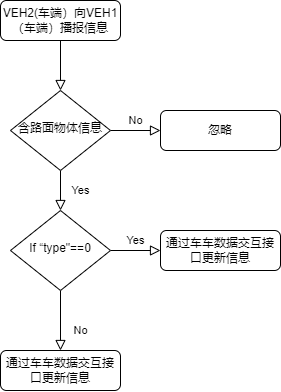

In [8]:
# 车车交互接口（针对路面物体信息为例）
# Euclidean distance
def euclidean_distance(p, q):
    if len(p) != len(q):
        raise ValueError("Points must have the same dimensionality")
    return math.sqrt(sum((pi - qi) ** 2 for pi, qi in zip(p, q)))

# Vehicle2-2-Vehicle1
source_conn = sqlite3.connect('VEH2.db')
source_cursor = source_conn.cursor()

destination_conn = sqlite3.connect('VEH1.db')
destination_cursor = destination_conn.cursor()

table_name = 'RoadObject'
source_cursor.execute(f'SELECT * FROM {table_name}')
data_from_table = source_cursor.fetchall()

# Copy data to VEH1[RoadObject]
# Mechanism of Interaction between Vehicle2-Vehicle1
condition_met = False
for row in data_from_table:
    if row[1] == '0':
        condition_met = True
        break

if condition_met:
    print("当前车车交互信息满足车车路面物体信息交互机制(静态)")
else:
    print("当前车车交互信息不满足车车路面物体信息交互机制（静态）")

given_name = ['type', 'position', 'distance', 'length', 'width', 'height']

for i in range(len(given_name)):
    source_cursor.execute(f"SELECT VALUE FROM {table_name} WHERE NAME=?", (given_name[i],))
    value_for_given_name = source_cursor.fetchone()
    
    # 如果找到了匹配数据，将其更新到目标数据库
    if given_name[i] != 'distance':
        if value_for_given_name:
            # 删除目标数据库中的现有匹配行
            destination_cursor.execute(f"DELETE FROM {table_name} WHERE NAME=?", (given_name[i],))
            # 更新新数据
            destination_cursor.execute(f"INSERT INTO {table_name} (NAME, VALUE) VALUES (?, ?)", (given_name[i], value_for_given_name[0]))

            print(f"成功更新'{table_name}'中的'{given_name[i]}'的数据")
        else:
            print("数据库'{table_name}'没有进行任何变动")
    elif given_name[i] == 'distance':
        if value_for_given_name:
            # VEH1 current position
            given_name_vs = 'position'
            table_vs = 'VehicleStatus'
            destination_cursor.execute(f'SELECT VALUE FROM {table_vs} WHERE NAME=?', (given_name_vs,))
            value_for_given_name_vs = destination_cursor.fetchone()
            dt_transfer_list = value_for_given_name_vs[0].split(',')

            x_veh1 = np.float(dt_transfer_list[0])
            y_veh1 = np.float(dt_transfer_list[1])
            veh1_po = [x_veh1, y_veh1]

            # Object current position
            object_position = 'position'
            table_ro = 'RoadObject'
            source_cursor.execute(f'SELECT VALUE FROM {table_ro} WHERE NAME=?', (object_position,))
            value_for_object_position = source_cursor.fetchall()
            dt2_transfer_list = value_for_object_position[-1][0].split(',')

            x_object = np.float(dt2_transfer_list[0])
            y_object = np.float(dt2_transfer_list[1])
            obeject_p = [x_object, y_object]

            # Calculate distance
            e_distance = euclidean_distance(veh1_po, obeject_p)
            
            # 删除目标数据库中的现有匹配行
            destination_cursor.execute(f"DELETE FROM {table_name} WHERE NAME=?", (given_name[i],))
            # 更新新数据
            destination_cursor.execute(f"INSERT INTO {table_name} (NAME, VALUE) VALUES (?, ?)", (given_name[i], e_distance))

            print(f"成功更新'{table_name}'中的'{given_name[i]}'的数据")
        else:
            print("数据库'{table_name}'没有进行任何变动")
    else:
        pass

destination_conn.commit()
source_conn.close()
destination_conn.close()

当前车车交互信息满足车车路面物体信息交互机制(静态)
成功更新'RoadObject'中的'type'的数据
成功更新'RoadObject'中的'position'的数据
成功更新'RoadObject'中的'distance'的数据
成功更新'RoadObject'中的'length'的数据
成功更新'RoadObject'中的'width'的数据
成功更新'RoadObject'中的'height'的数据


In [9]:
# 查询数据库内容
conn1 = sqlite3.connect('VEH1.db')
cursor1 = conn1.cursor()
table_name = "RoadObject"
cursor1.execute(f'PRAGMA table_info({table_name})')
table_columns = cursor1.fetchall()
column_names = [column[1] for column in table_columns]

cursor1.execute(f'SELECT * FROM {table_name}')
data_from_table = cursor1.fetchall()

print(f'{table_name} 表的全部内容：')
print(column_names)
for row in data_from_table:
    print(row)

conn1.close()

RoadObject 表的全部内容：
['NAME', 'VALUE']
('type', '0')
('position', '8.8000,15.5700')
('distance', '32.7723450488365')
('length', '2.15')
('width', '0.61')
('height', '0.81')


### 3车云交互
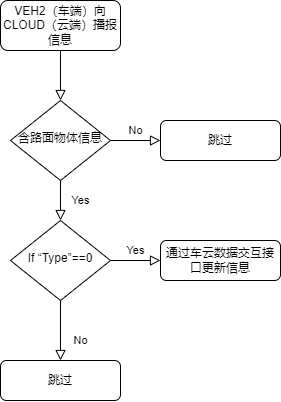

In [11]:
# 车云交互接口（针对路面物体信息为例）
# Vehicle2-2-CLOUD
source_conn = sqlite3.connect('VEH2.db')
source_cursor = source_conn.cursor()

destination_conn = sqlite3.connect('CLOUD_1.db')
destination_cursor = destination_conn.cursor()

table_name = 'RoadObject'
source_cursor.execute(f'SELECT * FROM {table_name}')
data_from_table = source_cursor.fetchall()

# Mechanism of Interaction between Vehicle2-CLOUD
condition_met = False
# 车云交互中，不用交互distance数据，该数据可由车端交互时自行计算得出
given_name = ['type', 'position', 'length', 'width', 'height']

for row in data_from_table:
    if row[1] == '0':
        condition_met = True
        break

if condition_met:
    print("当前车-云交互信息满足车云路面物体信息交互机制(静态)")
    for i in range(len(given_name)):
        source_cursor.execute(f"SELECT VALUE FROM {table_name} WHERE NAME=?", (given_name[i],))
        value_for_given_name = source_cursor.fetchone()
        # 如果找到了匹配数据，将其更新到目标数据库
        if value_for_given_name:
            # 删除目标数据库中的现有匹配行
            destination_cursor.execute(f"DELETE FROM {table_name} WHERE NAME=?", (given_name[i],))
            # 更新新数据
            destination_cursor.execute(f"INSERT INTO {table_name} (NAME, VALUE) VALUES (?, ?)", (given_name[i], value_for_given_name[0]))

            print(f"成功更新'{table_name}'中的'{given_name[i]}'的数据")
        
    # 识别静态物体导致的交通管控（车道关闭），更新交通管控数据表
    # 云端先获取播报信息车辆所在的车道
    name_table_vs = ['VehicleStatus']
    value_vs_laneid = ['laneid']
    name_trafficcontrol = ['TrafficControl']
    
    source_cursor.execute(f"SELECT VALUE FROM {name_table_vs[0]} WHERE NAME=?", (value_vs_laneid[0],))
    value_for_vs_laneid = source_cursor.fetchone()
#     print(value_for_vs_laneid)
    # 然后，更新至交通管控数据表
    # 更新数据库中对应 NAME 的 VALUE 值
    # cursor.execute("UPDATE VS SET VALUE=? WHERE NAME=?", (new_value, given_name))
    destination_cursor.execute(f"UPDATE {name_trafficcontrol[0]} SET VALUE=? WHERE NAME=?", (value_for_vs_laneid[0], value_vs_laneid[0]))
    # 更新type，vehicle，direction，velocity，height，reason
    tc_value_type = 0
    tc_value_vehilce = 0
    tc_value_direction = 3
    tc_value_reason = 0
    tc_name = ['type', 'vehilce', 'direction', 'reason']
    tc_value = [tc_value_type, tc_value_vehilce, tc_value_direction, tc_value_reason]
    for j in range(len(tc_value)):
#         print(tc_value[j])
#         print(tc_name[j])
        destination_cursor.execute(f"UPDATE {name_trafficcontrol[0]} SET VALUE=? WHERE NAME=?", (tc_value[j], tc_name[j]))
        destination_conn.commit()
        print(f"成功更新{name_trafficcontrol[0]}中的{tc_name[j]}的数据")
               
else:
    print("当前车-云交互信息不满足车云路面物体信息交互机制（静态）")

destination_conn.commit()
source_conn.close()
destination_conn.close()

当前车-云交互信息满足车云路面物体信息交互机制(静态)
成功更新'RoadObject'中的'type'的数据
成功更新'RoadObject'中的'position'的数据
成功更新'RoadObject'中的'length'的数据
成功更新'RoadObject'中的'width'的数据
成功更新'RoadObject'中的'height'的数据
成功更新TrafficControl中的type的数据
成功更新TrafficControl中的vehilce的数据
成功更新TrafficControl中的direction的数据
成功更新TrafficControl中的reason的数据


In [13]:
conn3 = sqlite3.connect('CLOUD_1.db')
cursor3 = conn3.cursor()

table_name = "RoadObject"
cursor3.execute(f'PRAGMA table_info({table_name})')
table_columns = cursor3.fetchall()
column_names = [column[1] for column in table_columns]

cursor3.execute(f'SELECT * FROM {table_name}')
data_from_table = cursor3.fetchall()

print(f'{table_name} 表的全部内容：')
print(column_names)
for row in data_from_table:
    print(row)

conn3.close()

RoadObject 表的全部内容：
['NAME', 'VALUE']
('type', '0')
('position', '8.8000,15.5700')
('length', '2.15')
('width', '0.61')
('height', '0.81')


In [14]:
conn3 = sqlite3.connect('CLOUD_1.db')
cursor3 = conn3.cursor()

table_name = "TrafficControl"
cursor3.execute(f'PRAGMA table_info({table_name})')
table_columns = cursor3.fetchall()
column_names = [column[1] for column in table_columns]

cursor3.execute(f'SELECT * FROM {table_name}')
data_from_table = cursor3.fetchall()

print(f'{table_name} 表的全部内容：')
print(column_names)
for row in data_from_table:
    print(row)

conn3.close()

TrafficControl 表的全部内容：
['NAME', 'VALUE']
('laneid', 'L1')
('type', '0')
('vehicle', 'null')
('direction', '3')
('velocity', 'null')
('height', 'null')
('reason', '0')
